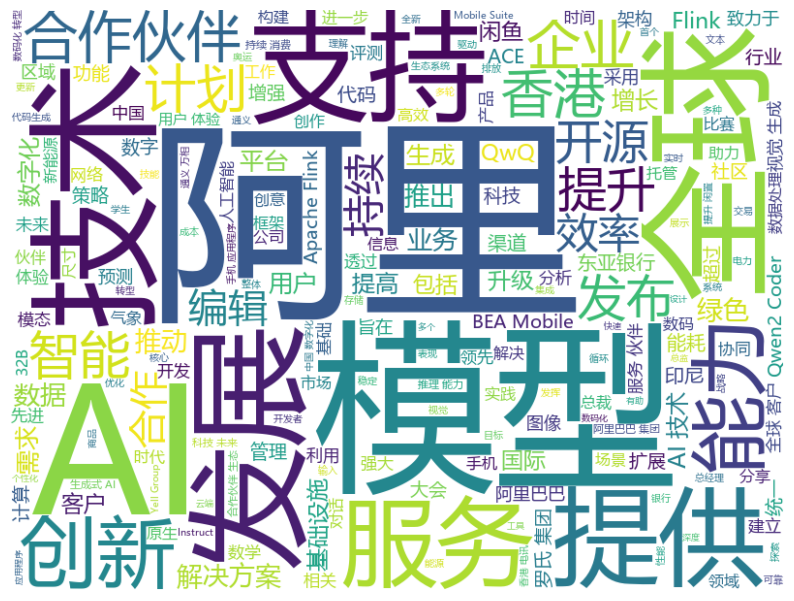

In [12]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 读取文本文件
file_path = '阿里新闻.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

# 2. 分词
words = jieba.cut(text)

# 3. 去除停用词
# 假设停用词文件是 stopwords.txt，里面每一行一个停用词
stopwords_path = '停用词.txt'

with open(stopwords_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# 过滤掉停用词
filtered_words = [word for word in words if word not in stopwords and len(word.strip()) > 1]

# 4. 生成词云图
wordcloud = WordCloud(font_path='msyh.ttc', width=800, height=600, background_color='white').generate(' '.join(filtered_words))

# 5. 显示词云图
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 不显示坐标轴
plt.show()


Building prefix dict from the default dictionary ...
Loading model from cache C:\WINDOWS\TEMP\jieba.cache
Loading model cost 0.610 seconds.
Prefix dict has been built successfully.


加载图片成功！
开始加载文本
生成词云成功!


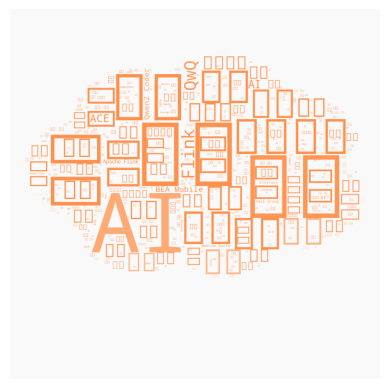

In [ ]:
import pickle
from os import path
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 读取停用词
def load_stopwords(stopwords_path):
    with open(stopwords_path, 'r', encoding='utf-8') as f:
        stopwords = set(f.read().splitlines())
    return stopwords

# 读取文本文件
text = ''
with open('阿里新闻.txt', 'r', encoding='utf8') as fin:
    for line in fin.readlines():
        line = line.strip('\n')
        # 分词
        words = jieba.cut(line)
        # 过滤掉停用词
        stopwords = load_stopwords('停用词.txt')  # 假设你的停用词文件为 stopwords.txt
        filtered_words = [word for word in words if word not in stopwords and len(word.strip()) > 1]
        # 连接分词结果
        text += ' '.join(filtered_words)

# 读取背景图片
background_Image = plt.imread('云.jpg')
print('加载图片成功！')

# 设置词云样式
wc = WordCloud(
    background_color='#f9f9f9',  # 设置背景颜色
    mask=background_Image,  # 设置背景图片
    font_path='C:\Windows\Fonts\STZHONGS.TTF',  # 中文字体路径
    max_words=2000,  # 设置最大显示字数
    stopwords=STOPWORDS,  # 设置停用词
    max_font_size=150,  # 设置字体最大值
    random_state=30  # 设置有多少种随机生成状态，即有多少种配色方案
)

wc.generate_from_text(text)
print('开始加载文本')

# 改变字体颜色
img_colors = ImageColorGenerator(background_Image)
# 字体颜色为背景图片的颜色
wc.recolor(color_func=img_colors)

# 显示词云图
plt.imshow(wc)
# 是否显示x轴、y轴下标
plt.axis('off')
# plt.show()
# wc.to_file('词云图.jpg')  # 将生成的词云图保存为 '词云图.png'
# 保存为高清图片
plt.savefig('词云图.jpg', format='jpg', dpi=2000, bbox_inches='tight')  # 设置高清分辨率
print('生成词云成功!')


In [7]:
background_Image = plt.imread('云.png')
print(background_Image.shape)  # 检查图片尺寸，确保加载成功


(625, 625, 4)
